In [1]:
using Trapz
using Plots

In [2]:
default(lw=2,markersize = 6,
    xtickfont=font(12), ytickfont=font(12), 
    guidefont=font(14), titlefont=font(12))

# Assumptions on Integration
Try computing
$$
\int_{-1}^1 \sqrt{|x|}dx = 4/3
$$
using composite Trapezoidal rule.  Note that this function has a cusp at $x=0$, and will not have a first or second derivative there, violating the assumptions of the theorem on Composite trapezoidal rule.

In [3]:
f(x) = sqrt(abs(x));
a = -1;
b = 1;

n_vals = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048];
err_vals = Float64[];
∫f_exact = 4/3;

for n in n_vals
    x_nodes = LinRange(a,b,n+1);
    f_nodes = f.(x_nodes);
    ∫f_trapz = trapz(x_nodes, f_nodes);
    push!(err_vals, abs(∫f_exact - ∫f_trapz));
    println("n = $n: Composite Trapezoidal Estimate = $∫f_trapz, Absolute Error = $(abs(∫f_exact - ∫f_trapz))");
end

n = 2: Composite Trapezoidal Estimate = 1.0, Absolute Error = 0.33333333333333326
n = 4: Composite Trapezoidal Estimate = 1.2071067811865475, Absolute Error = 0.1262265521467858
n = 8: Composite Trapezoidal Estimate = 1.2865660924854931, Absolute Error = 0.04676724084784012
n = 16: Composite Trapezoidal Estimate = 1.316260443248909, Absolute Error = 0.017072890084424364
n = 32: Composite Trapezoidal Estimate = 1.327162393754456, Absolute Error = 0.006170939578877155
n = 64: Composite Trapezoidal Estimate = 1.3311178725578836, Absolute Error = 0.0022154607754496514
n = 128: Composite Trapezoidal Estimate = 1.332541622757015, Absolute Error = 0.0007917105763182164
n = 256: Composite Trapezoidal Estimate = 1.333051314593652, Absolute Error = 0.0002820187396812557
n = 512: Composite Trapezoidal Estimate = 1.3332330979530571, Absolute Error = 0.00010023538027614798
n = 1024: Composite Trapezoidal Estimate = 1.3332977630999034, Absolute Error = 3.55702334298158e-5
n = 2048: Composite Trapezo

This works, even though $f$ is not a $C^2$ (or even $C^1$) funciton on $[-1,1]$.

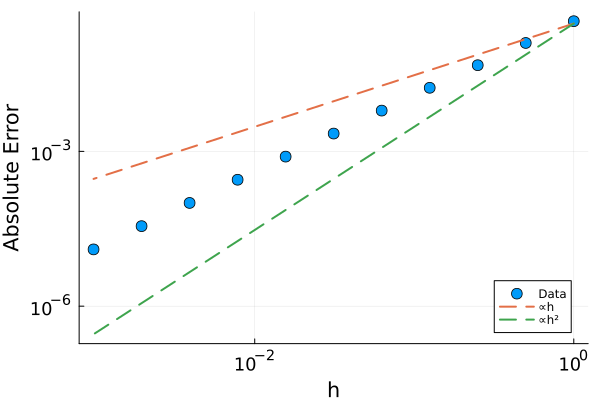

In [4]:
h_vals   = 2 ./(n_vals);    
scatter(h_vals, err_vals, label= "Data", xscale=:log10, yscale=:log10, xlabel="h", ylabel="Absolute Error", legend=:bottomright)
plot!(h_vals,.3 * h_vals, label="∝h", ls=:dash)
plot!(h_vals, .3 * h_vals.^2, label="∝h²", ls=:dash)

This is neither linear ($\propto h$), nor is it quadratic ($\propto h^2$).  If $f$ were smooth; it would be quadratic.

Try estimating the order of convergence from the data.

In [5]:
using DataFrames, GLM

data = DataFrame(y = log.(err_vals), x = log.(h_vals))
model = lm(@formula(y ~ x), data) # fits a linear model of y = c0 + c1 x


StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y ~ 1 + x

Coefficients:
─────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  -1.03603  0.0179616   -57.68    <1e-12   -1.07666  -0.995394
x             1.47294  0.00438011  336.28    <1e-19    1.46303   1.48285
─────────────────────────────────────────────────────────────────────────

This suggests a value of $p =1.47294 \approx 1.5$, in the sense that the absolute error is $\mathrm{O}(h^p)$.

**Conclusion**: We can (sometimes) use quadrature rules on problems for which they do not theoretically apply, but the order of convergence may be less than optimal.